In [323]:
# importing features list from user_playlist_songs.py including all the songs and its features
import import_ipynb
from user_playlist_songs import features_list as fl_user_playlist
from user_last_played_songs import features_list as fl_last_played

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
class create_dict(dict):
    def __init__(self):
        self = dict()

    def add(self, key, value):
        self[key] = value

# Data Wrangling the All of User's Playlists

In [326]:
songs_playlist_df = pd.DataFrame(fl_user_playlist) # converting list to pandas dataframe
songs_playlist_df.head()

,track_name,artist_name,artist_pop,artist_genres,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_pop
0,You Right,Doja Cat,88,"[dance pop, pop]",Planet Her,0.828,0.621,-6.414,0.0565,0.016400,0.002330,0.0845,0.436,128.986,186173,4,85
1,Wild Side (feat. Cardi B),Normani,68,"[dance pop, pop, post-teen pop, r&b, uk pop, u...",Wild Side (feat. Cardi B),0.740,0.576,-6.744,0.1460,0.024900,0.000000,0.1040,0.315,110.095,209476,4,7
2,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,"[canadian pop, pop]",Justice,0.677,0.696,-6.181,0.1190,0.321000,0.000000,0.4200,0.464,90.030,198082,4,87
3,Chicken Lemon Rice,Priya Ragu,42,[zurich indie],damnshestamil,0.516,0.895,-5.770,0.0919,0.000376,0.540000,0.4920,0.694,199.923,153019,4,38
4,LALA (Unlocked) (feat. Swae Lee),Alicia Keys,76,"[hip pop, neo soul, pop, r&b, urban contemporary]",LALA (Unlocked) (feat. Swae Lee),0.615,0.560,-4.938,0.1840,0.088900,0.000114,0.3140,0.330,139.441,266937,4,48


<p>Removing duplicates from the dataset based on the track name using <strong>drop_duplicates</strong>. We can see the number of rows left using <strong>shape attribute</strong>. </p>

In [327]:
print(songs_playlist_df.shape)
songs_playlist_df.drop_duplicates(subset='track_name', inplace=True) # removing duplicate songs based on track name
print(songs_playlist_df.shape)

(2596, 17)
(2164, 17)


<p>Checking if there are any null values in the dataset and the types of all the columns</p>

In [328]:
print(songs_playlist_df.isna().sum())
print(songs_playlist_df.dtypes)

track_name          0
artist_name         0
artist_pop          0
artist_genres       0
album               0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
track_pop           0
dtype: int64
track_name           object
artist_name          object
artist_pop            int64
artist_genres        object
album                object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
track_pop             int64
dtype: object


In [329]:
print(songs_playlist_df.track_pop.describe())

count    2164.000000
mean       53.090111
std        22.863820
min         0.000000
25%        41.000000
50%        56.000000
75%        70.000000
max       100.000000
Name: track_pop, dtype: float64


<p>Creating a dictionary of all the unique genres from the artist_genres column</p>

In [330]:
all_unique_genres_playlist = create_dict()
for genre in songs_playlist_df["artist_genres"]:
    
    for genre_name in genre:
        # creating a bag of words for artist genres based on count of genres
        if genre_name not in all_unique_genres_playlist:
            all_unique_genres_playlist.add(genre_name,1)
        if genre_name in all_unique_genres_playlist:
            all_unique_genres_playlist[genre_name]+=1
        

print(len(all_unique_genres_playlist))

651


<p>Creating a new column <strong>genre_score</strong> which contains the sum of the list of genres from the <strong>artist_genres</strong> column. The sum is calculated using the the dictionary values of each genre</p>

In [331]:
# added new column to dataframe for all the unique genres
for row in songs_playlist_df.iterrows():
    genre_score=0 # initializing genre score to 0
    for genre in row[1]["artist_genres"]: # iterating through all the genres of a song
        genre_score = genre_score+all_unique_genres_playlist[genre] # adding the score of each genre to genre score
    songs_playlist_df.loc[row[0], "genre_score"] = genre_score # adding the genre score to the dataframe
    # incase genre of a certain is not available in the dataframe, genre_score assigned = 0
    

<p>Rearranging the columns so that <strong>track_pop</strong> is the right most column</p>

In [332]:
# rearranging columns in dataframe
songs_playlist_df = songs_playlist_df[["track_name", "artist_name" ,"artist_pop", "artist_genres", "album", "danceability", "energy", "loudness",	"speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms" ,"time_signature", "genre_score", "track_pop"]]
songs_playlist_df.head()

,track_name,artist_name,artist_pop,artist_genres,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,You Right,Doja Cat,88,"[dance pop, pop]",Planet Her,0.828,0.621,-6.414,0.0565,0.016400,0.002330,0.0845,0.436,128.986,186173,4,819.0,85
1,Wild Side (feat. Cardi B),Normani,68,"[dance pop, pop, post-teen pop, r&b, uk pop, u...",Wild Side (feat. Cardi B),0.740,0.576,-6.744,0.1460,0.024900,0.000000,0.1040,0.315,110.095,209476,4,1166.0,7
2,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,"[canadian pop, pop]",Justice,0.677,0.696,-6.181,0.1190,0.321000,0.000000,0.4200,0.464,90.030,198082,4,574.0,87
3,Chicken Lemon Rice,Priya Ragu,42,[zurich indie],damnshestamil,0.516,0.895,-5.770,0.0919,0.000376,0.540000,0.4920,0.694,199.923,153019,4,3.0,38
4,LALA (Unlocked) (feat. Swae Lee),Alicia Keys,76,"[hip pop, neo soul, pop, r&b, urban contemporary]",LALA (Unlocked) (feat. Swae Lee),0.615,0.560,-4.938,0.1840,0.088900,0.000114,0.3140,0.330,139.441,266937,4,651.0,48


<p>Creating a new dataframe <strong>songs_playlist_df_num</strong> which contains only the numerical type columns</p>

In [333]:
songs_playlist_df_num = songs_playlist_df.select_dtypes(include=['int64', 'float64']) # selecting numerical columns
print(type(songs_playlist_df_num))

<class 'pandas.core.frame.DataFrame'>


<p>Creating a distribution plot to see the variations in the track popularity</p>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_pop', ylabel='Density'>

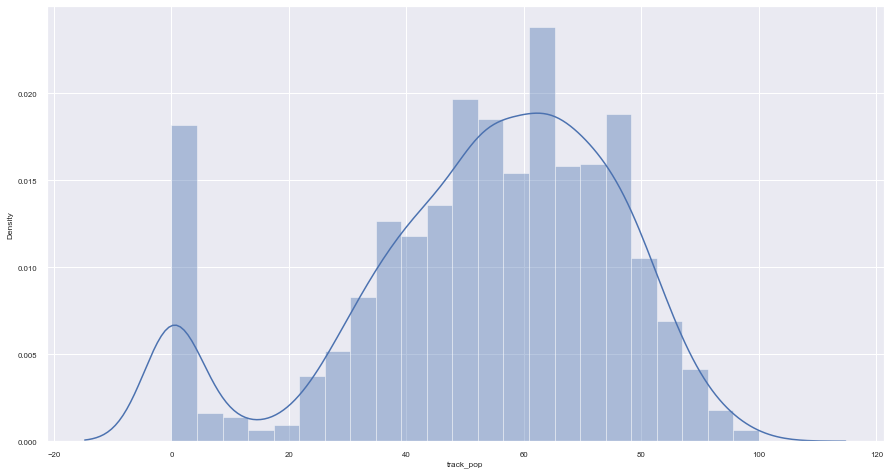

In [334]:
sns.distplot(songs_playlist_df_num['track_pop']) # plotting distribution of track popularity

<p>Since there is a high count of songs with a track popularity value of less than 10, we will drop those value so as to bring about a better distributed plot</p>
<p>Distributed plots also tells about skewedness of a dataset, which in turn tells us where our outliers lie.</p>

(1974, 14)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


artist_pop         -0.453291
danceability       -0.251236
energy             -0.449759
loudness           -1.518526
speechiness         3.108724
acousticness        0.701271
instrumentalness    3.722618
liveness            2.612345
valence             0.163482
tempo               0.471715
duration_ms         2.460896
time_signature     -4.095327
genre_score         0.632693
track_pop          -0.178269
dtype: float64

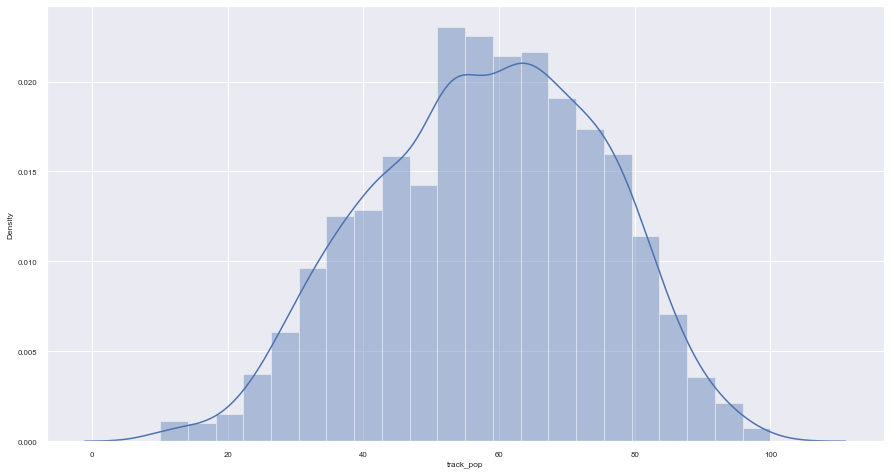

In [335]:
songs_playlist_df_num.drop(songs_playlist_df_num[songs_playlist_df_num['track_pop'] < 10].index, inplace=True) # removing songs with track popularity less than 7
print(songs_playlist_df_num.shape)
sns.distplot(songs_playlist_df_num['track_pop']) # plotting distribution of track popularity
songs_playlist_df_num.skew(axis=0, skipna=True)

<p>Using box plot to check the symmetry of the data, how tightly is the data grouped and if its skewed. Also using it to check for outliers

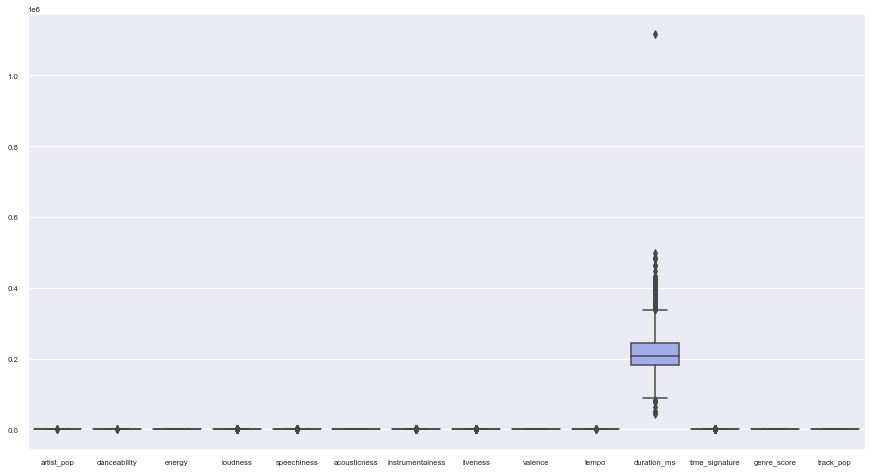

In [336]:
sns.boxplot(data=songs_playlist_df_num) # plotting boxplot of all the numerical columns before scaling (Standard)
sns.set(font_scale=.7)

In [337]:
songs_playlist_df_num.drop(songs_playlist_df_num[songs_playlist_df_num["duration_ms"]>1000000].index, inplace=True) #removing the outlier song that has a duration of about 18 minutes

<p>Scaling the data using Standard Scaler. This results in a mean value of 0 and standard deviation value of 1. We aren't using Min-Max Scaler in this situation as it is heavily influenced by the presence of outliers.</p>

In [338]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
songs_playlist_df_num_scaled = scaler.fit_transform(songs_playlist_df_num) # scaling numerical columns using min-max scaler


In [339]:
songs_playlist_df_num_scaled = pd.DataFrame(songs_playlist_df_num_scaled, columns=songs_playlist_df_num.columns) #converting numpy array to pandas dataframe
songs_playlist_df_num_scaled.head()

,artist_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,1.480707,1.474829,0.137279,0.382239,-0.228128,-0.976700,-0.278712,-0.642357,-0.182646,0.393621,-0.570254,0.209458,1.236880,1.592187
1,1.585377,0.469586,0.467165,0.441165,0.649436,-0.013143,-0.291163,1.950266,-0.063918,-0.974004,-0.365101,0.209458,0.554156,1.710645
2,-0.926695,-0.602228,1.342463,0.545108,0.268924,-1.027389,2.594437,2.506656,0.911350,2.884001,-1.141386,0.209458,-1.037008,-1.191574
3,0.852689,0.056838,-0.131028,0.755524,1.562101,-0.747357,-0.290554,1.131136,-0.632118,0.760664,0.821040,0.209458,0.768726,-0.599284
4,-0.926695,1.168596,-0.095841,0.803069,0.040056,-0.885279,-0.287604,1.787985,0.156578,-0.397092,-0.778869,0.209458,-1.037008,-0.836200


<p>Creating a boxplot again to visualise the changes after the scaling is done</p>

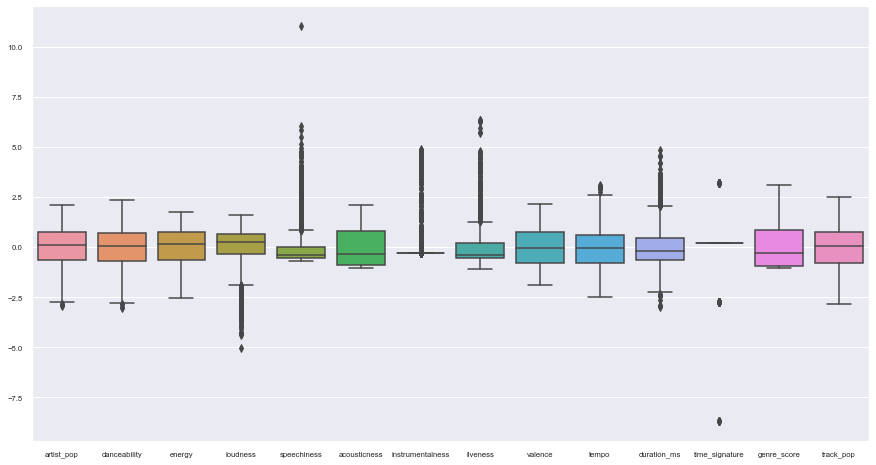

In [340]:
sns.boxplot(data=songs_playlist_df_num_scaled) # plotting boxplot of all the numerical columns after scaling (Standard)
sns.set(font_scale=.5)

<p>Finding correlation between track popularity and all the other numerical features (Pearson Correlation)</p>

In [342]:
# finding correlation between features and target variables
songs_playlist_df_corr = songs_playlist_df_num_scaled.corr()["track_pop"][:-1]
songs_playlist_df_corr
# top_features_playlist = songs_playlist_df_corr[abs(songs_playlist_df_corr) > 0.1].sort_values(ascending=False)
# print(top_features_playlist)

artist_pop          0.723316
danceability        0.176816
energy              0.144425
loudness            0.250093
speechiness         0.078250
acousticness       -0.120972
instrumentalness   -0.188474
liveness           -0.024593
valence             0.087821
tempo               0.001735
duration_ms        -0.104941
time_signature      0.079739
genre_score         0.390321
Name: track_pop, dtype: float64

<p>Creating a heatmap for a better visualisation of the correlations</p>

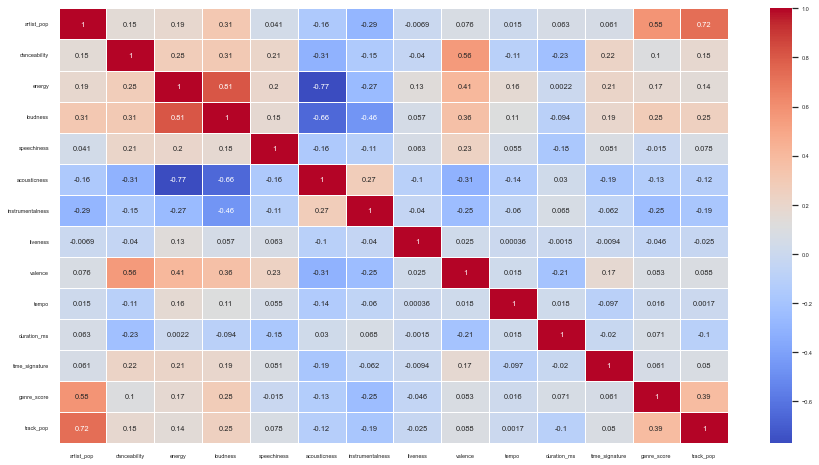

In [343]:
# creating heatmap of correlation between features and target variables
sns.heatmap(songs_playlist_df_num_scaled.corr(), annot=True, annot_kws={"size": 7.5}, cmap='coolwarm', linewidths=.5)
sns.set(rc = {'figure.figsize':(15,8)})

<p>Creating a KDE plot to check the density of track popularity versus other numerical features. We have use a <strong>KDE(Kernel Density Estimation Plot)</strong> as the <strong>scatter plot</strong> became too congested due to a higher number of data points.</p>

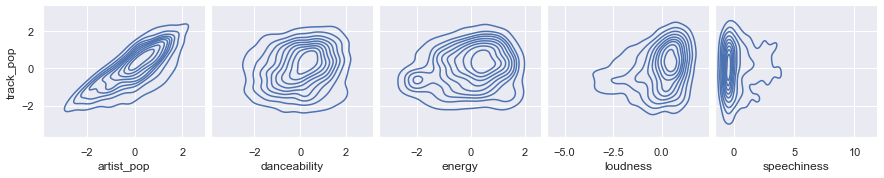

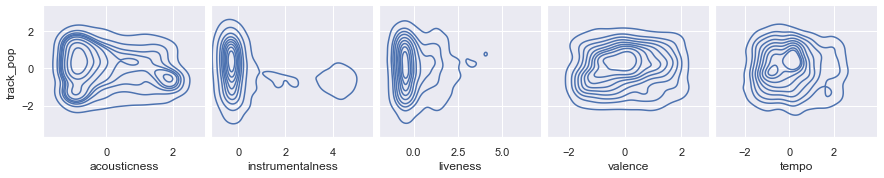

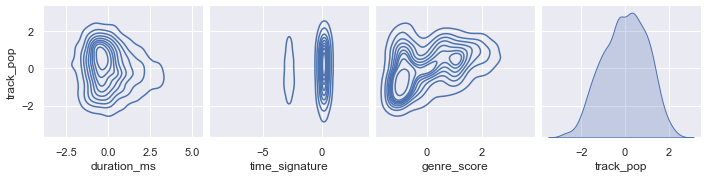

In [344]:
for i in range(0, len(songs_playlist_df_num_scaled.columns), 5):
    sns.pairplot(data=songs_playlist_df_num_scaled,
                x_vars=songs_playlist_df_num_scaled.columns[i:i+5],
                y_vars=["track_pop"],
                kind="kde"
                )


In [345]:
songs_playlist_df.head()

,track_name,artist_name,artist_pop,artist_genres,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,You Right,Doja Cat,88,"[dance pop, pop]",Planet Her,0.828,0.621,-6.414,0.0565,0.016400,0.002330,0.0845,0.436,128.986,186173,4,819.0,85
1,Wild Side (feat. Cardi B),Normani,68,"[dance pop, pop, post-teen pop, r&b, uk pop, u...",Wild Side (feat. Cardi B),0.740,0.576,-6.744,0.1460,0.024900,0.000000,0.1040,0.315,110.095,209476,4,1166.0,7
2,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,"[canadian pop, pop]",Justice,0.677,0.696,-6.181,0.1190,0.321000,0.000000,0.4200,0.464,90.030,198082,4,574.0,87
3,Chicken Lemon Rice,Priya Ragu,42,[zurich indie],damnshestamil,0.516,0.895,-5.770,0.0919,0.000376,0.540000,0.4920,0.694,199.923,153019,4,3.0,38
4,LALA (Unlocked) (feat. Swae Lee),Alicia Keys,76,"[hip pop, neo soul, pop, r&b, urban contemporary]",LALA (Unlocked) (feat. Swae Lee),0.615,0.560,-4.938,0.1840,0.088900,0.000114,0.3140,0.330,139.441,266937,4,651.0,48


In [346]:
# saving dataframe to csv file
songs_playlist_csv = songs_playlist_df.to_csv('/Users/nitanshjain/Documents/Data_Science_Learning/Spotify_Recommender_System/csv/songs_playlist_df.csv', index=False)

# Data Wrangling the User's Recently Played Songs (Last 50)
##### Have repeated the same steps as above for the recently played songs

In [347]:
songs_50_df = pd.DataFrame(fl_last_played)
songs_50_df.head()

,track_name,artist_name,artist_pop,artist_genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_pop
0,Cheerleader - Felix Jaehn Remix Radio Edit,OMI,64,[dance pop],0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.160,0.603,118.016,180566,4,79
1,Here Comes The Sun - Remastered 2009,The Beatles,82,"[beatlesque, british invasion, classic rock, m...",0.557,0.540,-10.484,0.0347,0.0339,0.002480,0.179,0.394,129.171,185733,4,82
2,Shallow,Lady Gaga,83,"[art pop, dance pop, pop]",0.572,0.385,-6.362,0.0308,0.3710,0.000000,0.231,0.323,95.799,215733,4,83
3,Sweet but Psycho,Ava Max,80,"[dance pop, pop]",0.720,0.706,-4.719,0.0473,0.0684,0.000000,0.166,0.620,133.002,187436,4,81
4,Tacones Rojos,Sebastian Yatra,80,"[colombian pop, latin, reggaeton colombiano]",0.748,0.856,-3.517,0.0348,0.0824,0.000000,0.142,0.927,123.031,189320,4,84


In [348]:
print(songs_50_df.shape)
songs_50_df.drop_duplicates(subset='track_name', inplace=True) # removing duplicate songs based on track name
print(songs_50_df.shape)

(50, 16)
(44, 16)


In [349]:
print(songs_50_df.isna().sum())
print(songs_50_df.dtypes)

track_name          0
artist_name         0
artist_pop          0
artist_genres       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
track_pop           0
dtype: int64
track_name           object
artist_name          object
artist_pop            int64
artist_genres        object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
track_pop             int64
dtype: object


In [350]:
print(songs_50_df.track_pop.describe())

count    44.000000
mean     69.068182
std      14.250904
min      33.000000
25%      58.250000
50%      74.000000
75%      79.250000
max      91.000000
Name: track_pop, dtype: float64


In [351]:
all_unique_genres_last_played = create_dict()
for genre in songs_50_df["artist_genres"]:
    
    for genre_name in genre:
        # creating a bag of words for artist genres based on count of genres
        if genre_name not in all_unique_genres_last_played:
            all_unique_genres_last_played.add(genre_name,1)
        if genre_name in all_unique_genres_last_played:
            all_unique_genres_last_played[genre_name]+=1
        

print(len(all_unique_genres_last_played))

63


In [352]:
# added new column to dataframe for all the unique genres
for row in songs_50_df.iterrows():
    genre_score=0 # initializing genre score to 0
    for genre in row[1]["artist_genres"]: # iterating through all the genres of a song
        genre_score = genre_score+all_unique_genres_last_played[genre] # adding the score of each genre to genre score
        
    songs_50_df.loc[row[0], "genre_score"] = genre_score # adding the genre score to the dataframe
    # incase genre of a certain is not available in the dataframe, genre_score assigned = 0

In [353]:
# rearranging columns in dataframe
songs_50_df = songs_50_df[["track_name", "artist_name" ,"artist_pop", "artist_genres", "danceability", "energy", "loudness",	"speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms" ,"time_signature", "genre_score" ,"track_pop"]]
songs_50_df.head()

,track_name,artist_name,artist_pop,artist_genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,Cheerleader - Felix Jaehn Remix Radio Edit,OMI,64,[dance pop],0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.160,0.603,118.016,180566,4,13.0,79
1,Here Comes The Sun - Remastered 2009,The Beatles,82,"[beatlesque, british invasion, classic rock, m...",0.557,0.540,-10.484,0.0347,0.0339,0.002480,0.179,0.394,129.171,185733,4,15.0,82
2,Shallow,Lady Gaga,83,"[art pop, dance pop, pop]",0.572,0.385,-6.362,0.0308,0.3710,0.000000,0.231,0.323,95.799,215733,4,34.0,83
3,Sweet but Psycho,Ava Max,80,"[dance pop, pop]",0.720,0.706,-4.719,0.0473,0.0684,0.000000,0.166,0.620,133.002,187436,4,32.0,81
4,Tacones Rojos,Sebastian Yatra,80,"[colombian pop, latin, reggaeton colombiano]",0.748,0.856,-3.517,0.0348,0.0824,0.000000,0.142,0.927,123.031,189320,4,14.0,84


In [354]:
songs_50_df_num = songs_50_df.select_dtypes(include=['int64', 'float64']) # selecting numerical columns
print(type(songs_50_df_num))

<class 'pandas.core.frame.DataFrame'>


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_pop', ylabel='Density'>

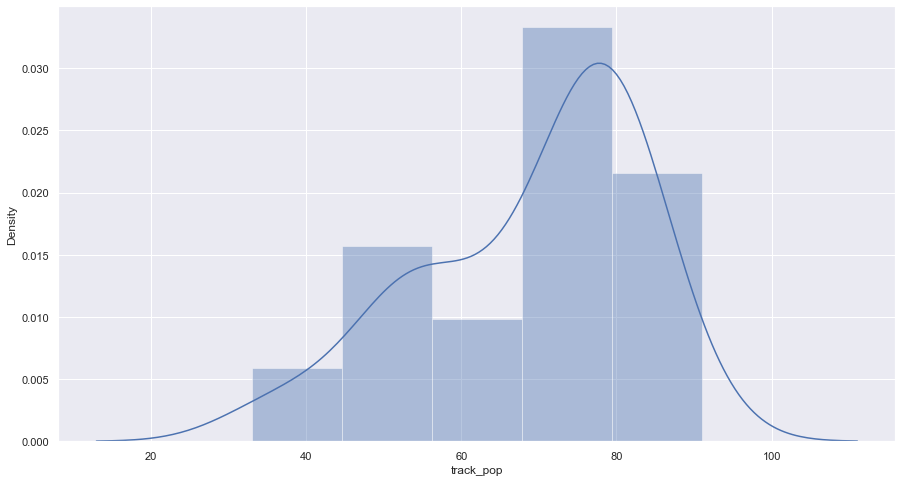

In [355]:
sns.distplot(songs_50_df_num['track_pop']) # plotting distribution of track popularity

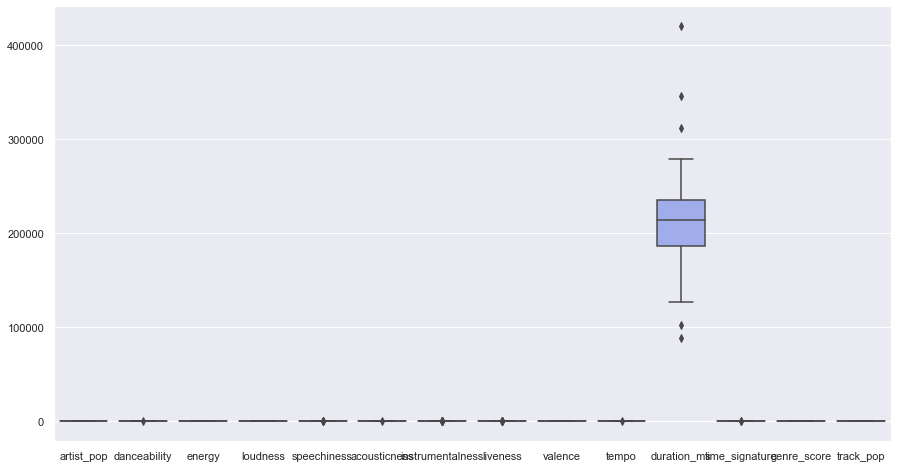

In [356]:
sns.boxplot(data=songs_50_df_num) # plotting boxplot of all the numerical columns before scaling (Standard)
sns.set(font_scale=.7)

In [357]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
songs_50_df_num_scaled = scaler.fit_transform(songs_50_df_num) # scaling numerical columns using min-max scaler


In [358]:
songs_50_df_num_scaled = pd.DataFrame(songs_50_df_num_scaled, columns=songs_50_df_num.columns) #converting numpy array to pandas dataframe
songs_50_df_num_scaled.head()

,artist_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,-0.409023,0.925943,0.358060,0.180160,-0.424060,-0.261866,-0.206728,-0.071713,-0.003461,-0.138690,-0.631835,0.218218,-0.403749,0.704983
1,0.957838,-0.598560,-0.512860,-1.710559,-0.395963,-0.808097,0.355929,0.048000,-0.912691,0.216934,-0.538828,0.218218,-0.256931,0.917929
2,1.033775,-0.496926,-1.443843,0.124511,-0.424800,0.585806,-0.209418,0.375636,-1.221568,-0.846974,0.001178,0.218218,1.137837,0.988912
3,0.805965,0.505858,0.484193,0.855957,-0.302799,-0.665440,-0.209418,-0.033909,0.070496,0.339068,-0.508173,0.218218,0.991019,0.846947
4,0.805965,0.695574,1.385144,1.391075,-0.395224,-0.607550,-0.209418,-0.185126,1.406064,0.021190,-0.474261,0.218218,-0.330340,1.059894


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_pop', ylabel='Density'>

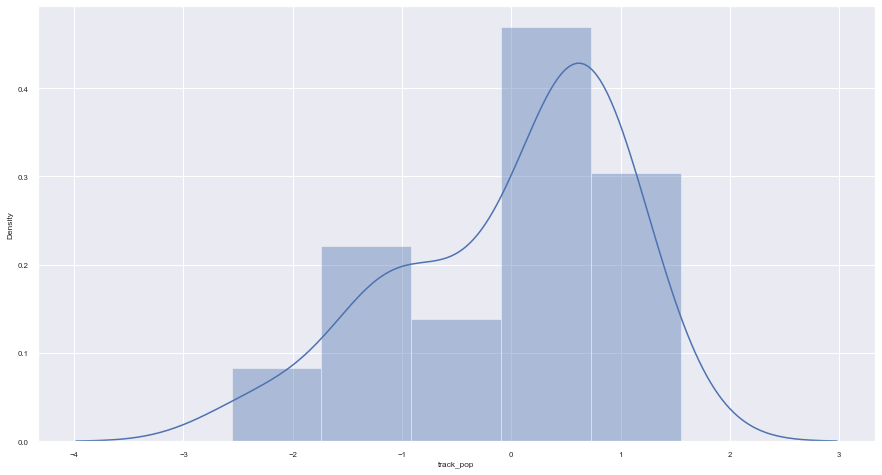

In [359]:
sns.distplot(songs_50_df_num_scaled['track_pop']) # plotting distribution of track popularity

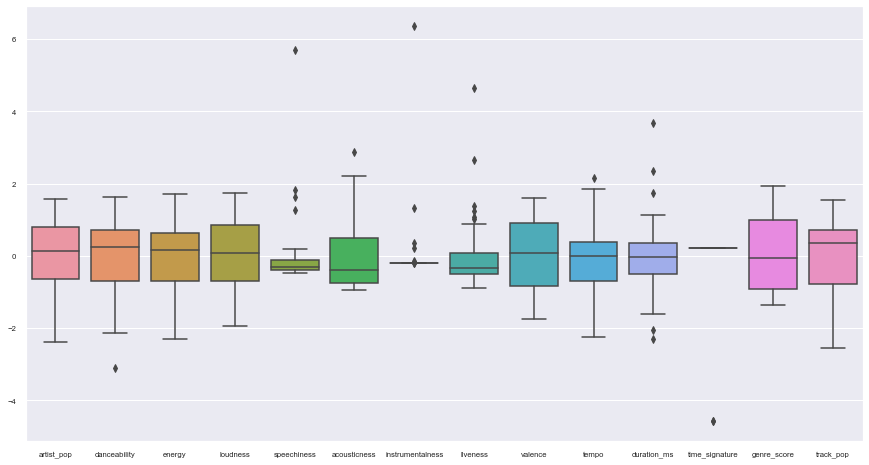

In [360]:
sns.boxplot(data=songs_50_df_num_scaled) # plotting boxplot of all the numerical columns after scaling (Standard)
sns.set(font_scale=.5)

In [361]:
# finding correlation between features and target variables
songs_50_df_corr = songs_50_df_num_scaled.corr()["track_pop"][:-1]
songs_50_df_corr
# top_features_last_played = songs_50_df_corr[abs(songs_50_df_corr) > 0.1].sort_values(ascending=False)
# print(top_features_last_played)

artist_pop          0.595470
danceability        0.080416
energy              0.388911
loudness            0.297278
speechiness        -0.070425
acousticness       -0.300374
instrumentalness    0.076634
liveness            0.059996
valence            -0.054548
tempo               0.121891
duration_ms        -0.171773
time_signature      0.070759
genre_score         0.233121
Name: track_pop, dtype: float64

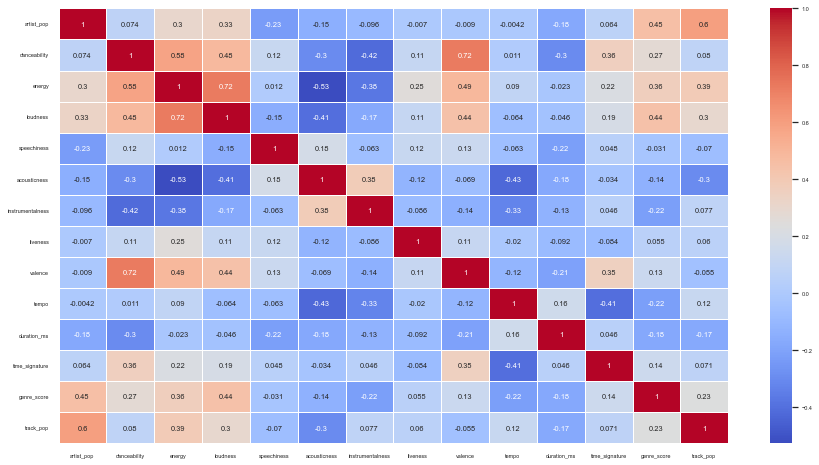

In [362]:
# creating heatmap of correlation between features and target variables
sns.heatmap(songs_50_df_num_scaled.corr(), annot=True, annot_kws={"size": 7.5}, cmap='coolwarm', linewidths=.5)
sns.set(rc = {'figure.figsize':(15,8)})

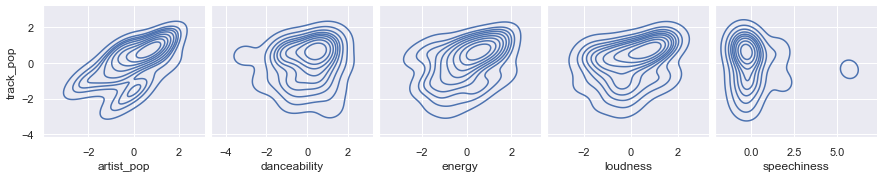

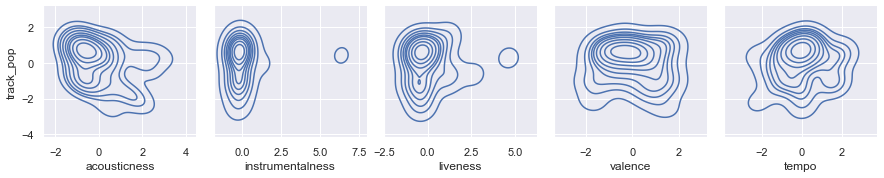

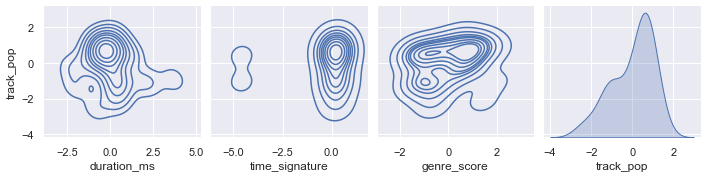

In [363]:
for i in range(0, len(songs_50_df_num_scaled.columns), 5):
    sns.pairplot(data=songs_50_df_num_scaled,
                x_vars=songs_50_df_num_scaled.columns[i:i+5],
                y_vars=["track_pop"],
                kind="kde"
                )


In [364]:
songs_50_df.head()

,track_name,artist_name,artist_pop,artist_genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,Cheerleader - Felix Jaehn Remix Radio Edit,OMI,64,[dance pop],0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.160,0.603,118.016,180566,4,13.0,79
1,Here Comes The Sun - Remastered 2009,The Beatles,82,"[beatlesque, british invasion, classic rock, m...",0.557,0.540,-10.484,0.0347,0.0339,0.002480,0.179,0.394,129.171,185733,4,15.0,82
2,Shallow,Lady Gaga,83,"[art pop, dance pop, pop]",0.572,0.385,-6.362,0.0308,0.3710,0.000000,0.231,0.323,95.799,215733,4,34.0,83
3,Sweet but Psycho,Ava Max,80,"[dance pop, pop]",0.720,0.706,-4.719,0.0473,0.0684,0.000000,0.166,0.620,133.002,187436,4,32.0,81
4,Tacones Rojos,Sebastian Yatra,80,"[colombian pop, latin, reggaeton colombiano]",0.748,0.856,-3.517,0.0348,0.0824,0.000000,0.142,0.927,123.031,189320,4,14.0,84


In [365]:
songs_50_df_csv = songs_50_df.to_csv('/Users/nitanshjain/Documents/Data_Science_Learning/Spotify_Recommender_System/csv/songs_50_df.csv', index=False)

```https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?referer=&httpsredir=1&article=4962&context=sis_research```
```http://cs229.stanford.edu/proj2015/140_report.pdf```

```https://chartio.com/learn/charts/what-is-a-scatter-plot/```
<br>
```https://seaborn.pydata.org/generated/seaborn.pairplot.html```
<br>
```https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51```
<br>
```https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55```
